# NetworkX weighted graph

In [1]:
import networkx as nx

In [34]:
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 0.125), 
                           (1, 3, 0.75), 
                           (2, 4, 1.2), 
                           (3, 4, 0.375)])

In [36]:
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5:
            print('%d, %d, %.3f' % (n, nbr, wt))

1, 2, 0.125
2, 1, 0.125
3, 4, 0.375
4, 3, 0.375


In [ ]:
vertices = {a, b, c, d, e, f};
weightededges = {{a -> b, 15}, {b -> c, 10}, {b -> d, 3}, {c -> e, 
    8}, {c -> d, 20}, {c -> f, 30}, {f -> b, 4}, {d -> e, 30}};

In [37]:
G2 = nx.Graph()
G.add_weighted_edges_from([(1, 2, 15),
                           (2, 3, 10),
                           (2, 4, 3),
                           (3, 5, 8),
                           (3, 4, 20),
                           (3, 6, 30),
                           (6, 2, 4),
                           (4, 5, 30)
                          ])

In [38]:
import matplotlib.pyplot as plt

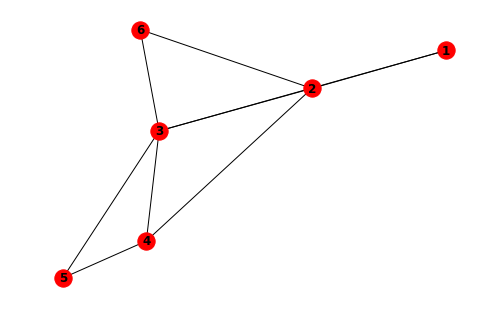

In [44]:
nx.draw(G, with_labels=True, font_weight='bold')

In [61]:
import random
random.seed(0)

In [128]:
G_ex = nx.DiGraph()
G_ex.add_weighted_edges_from([('a', 'b', random.randint(10, 100)),
                              ('a', 'c', random.randint(10, 100)),
                              ('a', 'd', random.randint(10, 100)),
                              ('b', 'd', random.randint(10, 100)),
                              ('b', 'h', random.randint(10, 100)),
                              ('c', 'e', random.randint(10, 100)),
                              ('c', 'd', random.randint(10, 100)),
                              ('d', 'e', random.randint(10, 100)),
                              ('d', 'g', random.randint(10, 100)),
                              ('d', 'f', random.randint(10, 100)),
                              ('d', 'h', random.randint(10, 100)),
                              ('e', 'g', random.randint(10, 100)),
                              ('f', 'g', random.randint(10, 100)),
                              ('h', 'f', random.randint(10, 100)),
                              ('h', 'g', random.randint(10, 100))
                             ])


In [246]:
sources = []
targets = []
weights = []
edges = []

for a, b, c in nx.to_edgelist(G_ex):
    print(a, b, c['weight'])
    sources.append(a)
    targets.append(b)
    weights.append(c['weight'])
    edges.append([a, b])
    
print(sources)
print(targets)
print(weights)
print(edges)
verticies = copy.deepcopy(sources)
verticies.extend(targets)
print(verticies)
verticies = list(set(verticies))
verticies = sorted(verticies)
print(verticies)

a b 34
a c 33
a d 14
b d 88
b h 94
c e 43
c d 70
d e 18
d g 21
d f 96
d h 26
h f 20
h g 99
e g 29
f g 14
['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd', 'd', 'd', 'h', 'h', 'e', 'f']
['b', 'c', 'd', 'd', 'h', 'e', 'd', 'e', 'g', 'f', 'h', 'f', 'g', 'g', 'g']
[34, 33, 14, 88, 94, 43, 70, 18, 21, 96, 26, 20, 99, 29, 14]
[['a', 'b'], ['a', 'c'], ['a', 'd'], ['b', 'd'], ['b', 'h'], ['c', 'e'], ['c', 'd'], ['d', 'e'], ['d', 'g'], ['d', 'f'], ['d', 'h'], ['h', 'f'], ['h', 'g'], ['e', 'g'], ['f', 'g']]
['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd', 'd', 'd', 'h', 'h', 'e', 'f', 'b', 'c', 'd', 'd', 'h', 'e', 'd', 'e', 'g', 'f', 'h', 'f', 'g', 'g', 'g']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


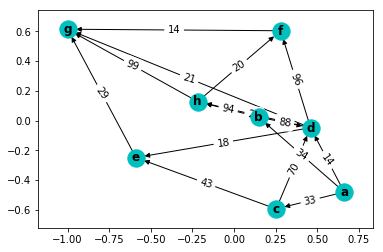

In [247]:
pos = nx.spring_layout(G_ex, k=0.8)
edge_labels = {(i, j): w['weight'] for i, j, w in G_ex.edges(data=True)}
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
nx.draw_networkx(G_ex, pos=pos, with_labels=True, font_weight='bold', node_color='c')

### Dijkstra's Algorithm

In [248]:
import copy

In [270]:
def dijkstra_algorithm(verticies, edges, weights):
    start = 'a'
    P = [start] # Past
    F = [start] # Future
    S = [] # Subset
    V = verticies # Vertcies'

    w_max = sum(weights)
    WM = {'a': [0, None], 'b': [w_max, None], 'c': [w_max, None],
          'd': [w_max, None], 'e': [w_max, None], 'f': [w_max, None], 
          'g': [w_max, None], 'h': [w_max, None]}

    for count in range(10):
#         print(count)
#         print('F: ', F)
#         print('S: ', S)
#         print('WM: ', WM)
#         print('P: ', P)
#         print('V: ', V)

        # 1
        if sorted(list(set(P))) != V:
            # 2
            subtract_set = copy.deepcopy(V)
            for p in P:
                if p in subtract_set:
                    subtract_set.remove(p)
                    
#             print('subtract_set: ', subtract_set)
            
            E_cand = []
            for f in F:
                for v in subtract_set:
                    if [f, v] in edges:
                        E_cand.append([f , v])
            
#             print('E_cand: ', E_cand)
            # 2 if
            if E_cand != []:
                # 3
                for src, tar in E_cand:
                    position = edges.index([src, tar])
                    if WM[tar][0] > WM[src][0] + weights[position]:
                        WM[tar][0] = WM[src][0] + weights[position]
                        WM[tar][1] = src
                        
                # 4
                w_min = w_max
                for v in subtract_set:
                    w = WM[v][0]
                    if w != 0 and w < w_min:
                        new = v
                    
                P.append(new)
                F.append(new)
                S.append((WM[new][1], new))
            
            # 2 else
            else:
                F = None
#                 print('2 else')
                
        else:
            break
            
    print(WM)
    print(S)

In [271]:
for a, b, c in nx.to_edgelist(G_ex):
    sources.append(a)
    targets.append(b)
    weights.append(c['weight'])
    edges.append([a, b])
    
verticies = copy.deepcopy(sources)
verticies.extend(targets)
verticies = list(set(verticies))
verticies = sorted(verticies)

dijkstra_algorithm(verticies, edges, weights)

{'a': [0, None], 'b': [34, 'a'], 'c': [33, 'a'], 'd': [14, 'a'], 'e': [32, 'd'], 'f': [60, 'h'], 'g': [35, 'd'], 'h': [40, 'd']}
[('a', 'd'), ('d', 'h'), ('d', 'g'), ('h', 'f'), ('d', 'e'), ('a', 'c'), ('a', 'b')]


In [272]:
nx.single_source_dijkstra_path_length(G_ex, 'a')

{'a': 0, 'd': 14, 'e': 32, 'c': 33, 'b': 34, 'g': 35, 'h': 40, 'f': 60}